In [415]:
import numpy as np
from cv2 import cv2
import matplotlib.pyplot as plt

In [416]:
def binarise(im,thres):
    height=im.shape[0]
    width=im.shape[1]
    res=np.empty(im.shape,np.uint8)
    for h in range(height):
        for w in range(width):
            if im[h,w]<=thres:
                res[h,w]=0
            else:
                res[h,w]=1
    return res

In [417]:
def linContrastStretchin(im,a,b):
    if len(im.shape)==3:
        channels=im.shape[2]
    else:
        channels=1
    b=np.array([b]*channels)
    a=np.array([a]*channels)
    min_px=im.min(axis=(0,1))
    max_px=im.max(axis=(0,1))
    temp=((b-a)/(max_px-min_px))*(im-min_px)+a
    temp=temp.astype(int)
    return temp

In [418]:
def dise_output(dice_img,blur_size,mor_size):
    dice_img=cv2.blur(dice_img,(blur_size,blur_size))
    bimg=binarise(dice_img,100)
    kernel=np.ones((mor_size,mor_size),np.uint8)
    bimg=cv2.morphologyEx(bimg, cv2.MORPH_CLOSE,kernel)
    bimg=cv2.morphologyEx(bimg,cv2.MORPH_OPEN,kernel)
    ret, labels = cv2.connectedComponents(bimg)
    return ret-2

In [419]:
dice_img=cv2.imread('d3.jpeg',cv2.IMREAD_GRAYSCALE)


In [420]:
print(dise_output(dice_img,5,7))

3


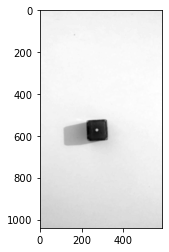

In [393]:
dice_img=cv2.blur(dice_img,(5,5))
plt.imshow(dice_img,cmap='gray')

In [395]:
bimg=binarise(dice_img,100)

In [396]:
kernel =np.ones((7,7),np.uint8)


In [397]:
print(kernel)

[[1 1 1 1 1 1 1]
 [1 1 1 1 1 1 1]
 [1 1 1 1 1 1 1]
 [1 1 1 1 1 1 1]
 [1 1 1 1 1 1 1]
 [1 1 1 1 1 1 1]
 [1 1 1 1 1 1 1]]


In [398]:
bimg=cv2.morphologyEx(bimg, cv2.MORPH_CLOSE,kernel)
bimg=cv2.morphologyEx(bimg,cv2.MORPH_OPEN,kernel)

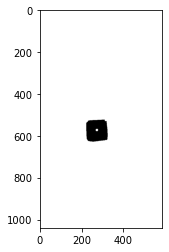

In [399]:
plt.imshow(bimg,cmap='gray')

In [400]:
ret, labels = cv2.connectedComponents(bimg)

In [401]:
print('the roll in dice is ',ret-2)

the roll in dice is  1


In [402]:
bb=linContrastStretchin(bimg,0,255)
cv2.imwrite('wri.jpeg',bb)

True